# Interactive Analysis
## Imports & Constants

In [18]:
import numpy as np
import pandas as pd
from pandas.core import datetools
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from textstat.textstat import textstat
import pprint, math, datetime, pandas.tseries

%matplotlib inline
%run -i datajson.py
# Ensures higher quality graphs!
%config InlineBackend.figure_format = 'retina'

In [2]:
# File Names
name = ['2017-10-02', '2017-10-06', '2017-10-16', '2017-10-25', '2017-11-01', '2017-11-13', '2017-11-25']
CURRENTS = ['../output/' + name + '.txt' for name in name]
CONCRETE = '../supplementary/word-database.csv'

# Lists
SUBJECTS = ['Mathematics', 'Biology', 'Economics', 'Culture', 'Chemistry',
            'Physics', 'Engineering', 'Technology', 'Repost', 'Other']
Q_TYPES = ['How', 'Why', 'What', 'When']
NEGATION = ['Positive', 'Negative']

# Databases
concrete_file = pd.read_csv(CONCRETE)
DATABASE = dict(zip(concrete_file['Word'], concrete_file['Conc.M']))

##  Utilities
The concreteness of a question is defined by the function `concrete_score` is the sum of the concrete scores of each of the words, if available in the database. The `concrete_score_avg` function controls for the number of words by normalizing or averaging the number of words which are counted.

In [14]:
# Utilities
def composel(outer, inner):
    def composed(*args, **kwargs):
        first = inner(*args, **kwargs)
        second = outer(first)
        return second
    return composed

def value(x):
    return x

# Grouping Functions
def question_type(text):
    """
    :param text: (str) a string representing a question
    :return: (str) a naive classification of the question type, looking for
        key question words
    """
    if 'how' in text or 'How' in text:
        return 'How'
    if 'why' in text or 'Why' in text:
        return 'Why'
    if 'what' in text or 'What' in text:
        return 'What'
    if 'when' in text or 'When' in text:
        return 'When'
    return ''

def has_negation(text):
    """
    :param text: (str) a string representing a question
    :return: (str) a naive classification of whether or not a question contains
        negation.
    """
    signals = ['not', "n't", 'instead', 'opposed', 'rather']
    for signal in signals:
        if signal in text:
            return 'Negative'
    return 'Positive'

def concrete_score(text):
    """
    :param text: (str) a string representing a question
    :return: (int) the sum of the concreteness scores of each word which are found
        in the database
    """
    words = text.split()
    total = 0
    for word in words:
        if word in DATABASE:
            total += DATABASE[word]
    return total

def concrete_score_avg(text):
    """
    :param text: (str) a string representing a question
    :return: (int) the average of the concreteness scores of each word found in the
        concreteness database
    """
    words = text.split()
    total, number = 0, 0
    for word in words:
        if word in DATABASE:
            total += DATABASE[word]
            number += 1
    return total / number if number else 0

def is_viral(score):
    if score > VIRAL_THRESHOLD:
        return 1
    return 0

In [4]:
# Collects (parses) posts and displats size
collected_posts = RedditDataJSON.from_filenames(CURRENTS)
raw_scores = {post['title']: int(post['score']) for post in collected_posts.posts}
score_distribution = [int(post['score']) for post in collected_posts.posts]
collected_posts.size

(700, 3)

## Simple Graphs
A series of examples which highlight the possible graphsusing the `RedditJSONData` Class.

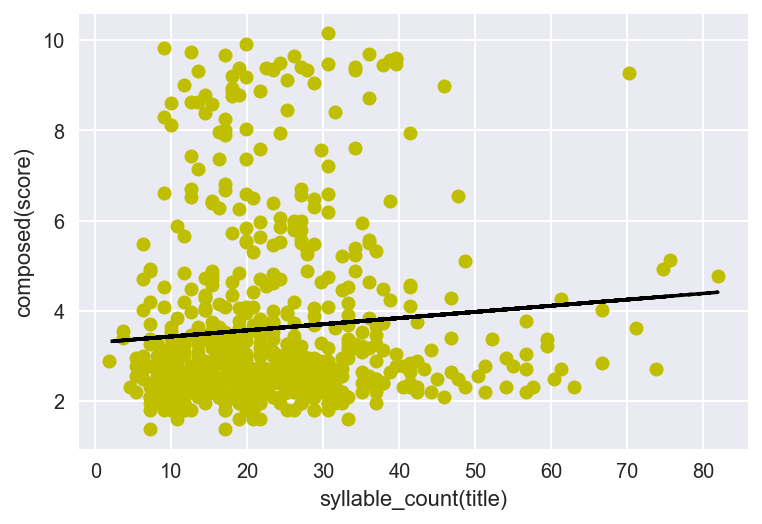

{'r_squared': 0.0070456457507112507}


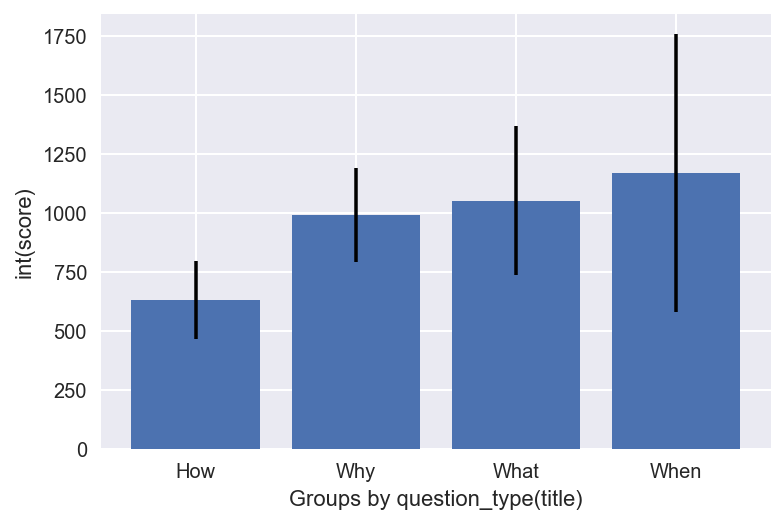

{'anova_f': 0.78851072088236518,
 'errors': [167.15043441823485,
            199.45474508471636,
            316.45160129675423,
            589.88176687272585],
 'maxs': [16728, 25541, 14075, 4709],
 'means': [629.99137931034488,
           990.19858156028374,
           1051.9183673469388,
           1166.9000000000001],
 'mins': [4, 5, 4, 11],
 'p-value': 0.50057348993919515,
 'sizes': [232, 282, 98, 10],
 'vars': ['How', 'Why', 'What', 'When']}


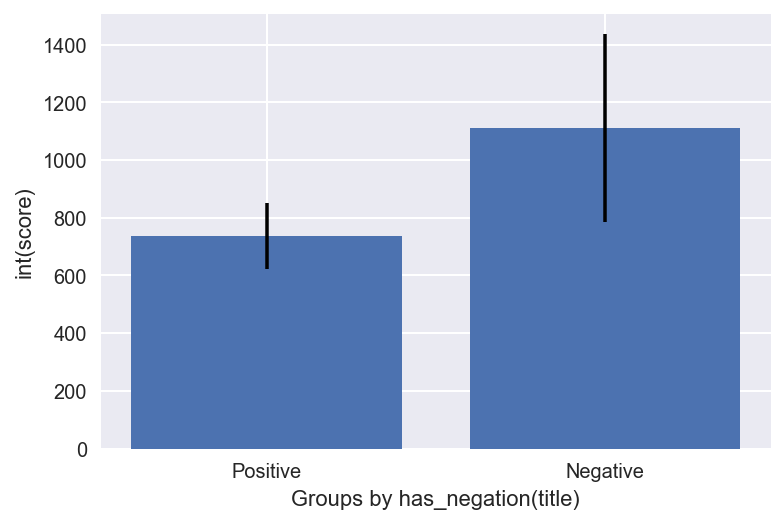

{'anova_f': 1.5160331769267359,
 'errors': [113.87280927402128, 325.11216393996182],
 'maxs': [25541, 16728],
 'means': [736.12080536912754, 1111.0384615384614],
 'mins': [4, 5],
 'p-value': 0.21863547233861491,
 'sizes': [596, 104],
 'vars': ['Positive', 'Negative']}


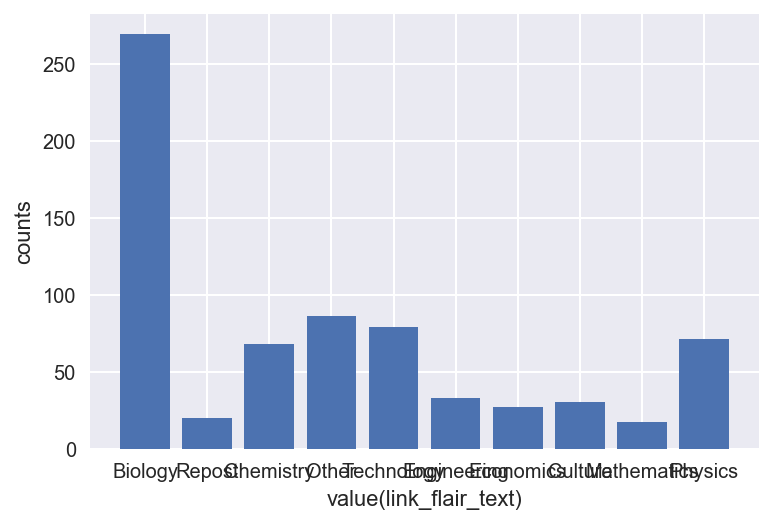

{'counts': [269, 20, 68, 86, 79, 33, 27, 30, 17, 71]}


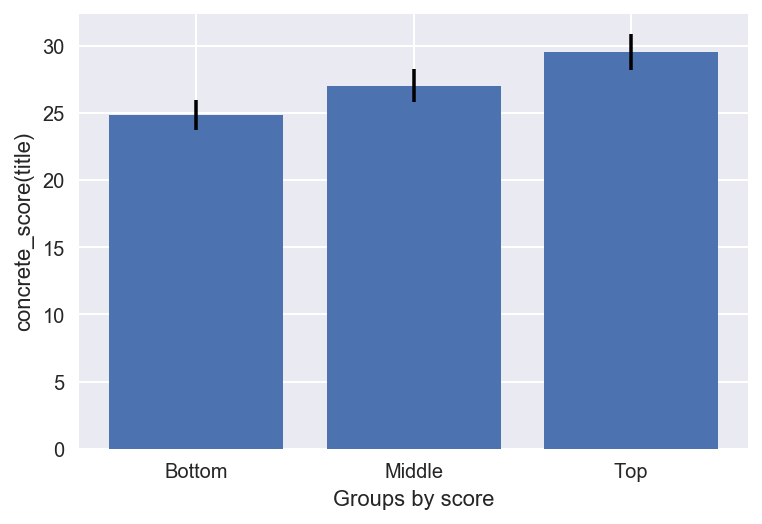

{'anova_f': 3.5699251415009794,
 'errors': [1.108771659143047, 1.2501357167739058, 1.336172050742835],
 'maxs': [78.269999999999996, 88.150000000000034, 108.95],
 'means': [24.874904761904759, 27.066571428571425, 29.539146919431282],
 'mins': [0, 0, 0],
 'p-value': 0.028730842535995907,
 'sizes': [210, 210, 211]}


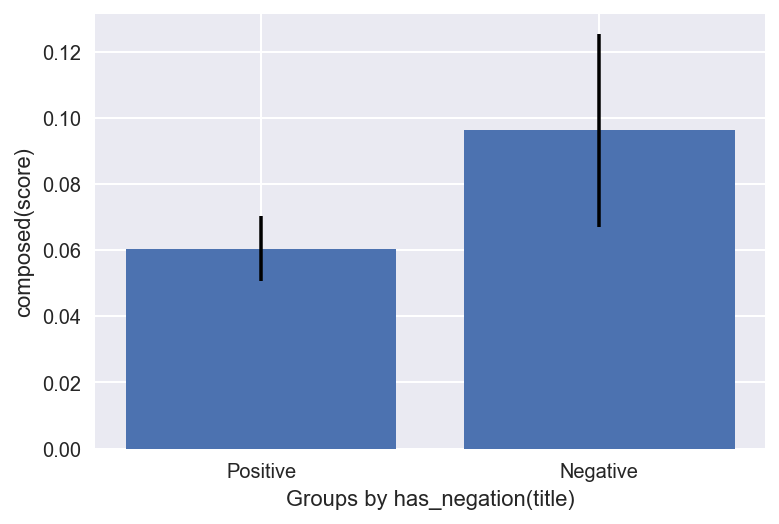

{'anova_f': 1.8429983869372017,
 'errors': [0.0097665352363624017, 0.029047715018613907],
 'maxs': [1, 1],
 'means': [0.060402684563758392, 0.096153846153846159],
 'mins': [0, 0],
 'p-value': 0.17503866163381349,
 'sizes': [596, 104],
 'vars': ['Positive', 'Negative']}


In [19]:
# Simple Scatter
out = collected_posts.plot_post_scatter('title', 'score', 
                                        textstat.syllable_count, 
                                        composel(math.log, int))
pprint.pprint(out)

# Question Type Comparison
out = collected_posts.compare_groups(Q_TYPES, question_type, 'title', 'score', int)
pprint.pprint(out)

# Negation Comparison
out = collected_posts.compare_groups(NEGATION, has_negation, 'title', 'score', int)
pprint.pprint(out)

# Categorical Counts
out = collected_posts.categorical_counts('link_flair_text', value)
pprint.pprint(out)

# Percentile Comparison
out = collected_posts.post_perc_groups(0.3, 'score', int, 'title', concrete_score)
pprint.pprint(out)

# Negation Comparison (Binary)
out = collected_posts.compare_groups(NEGATION, has_negation, 'title', 'score', composel(is_viral, int))
pprint.pprint(out)

## Randomness Testing 

In [6]:
# Utilities

def unix_to_week_time(time):
    date_obj = datetime.datetime.fromtimestamp(time)
    day_obj = date_obj.date()
    time_obj = date_obj.time()
    return day_obj.weekday() * 86400 + \
        time_obj.hour * 3600 + \
        time_obj.minute * 60 + \
        time_obj.second

def unix_to_day_time(time):
    date_obj = datetime.datetime.fromtimestamp(time)
    time_obj = date_obj.time()
    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second


def unix_to_hour_time(time):
    date_obj = datetime.datetime.fromtimestamp(time)
    time_obj = date_obj.time()
    return time_obj.minute * 60 + time_obj.second

DescribeResult(nobs=700, minmax=(4, 25541), mean=791.82285714285717, variance=8216089.0472593512, skewness=4.563133488842884, kurtosis=22.60071476437854)


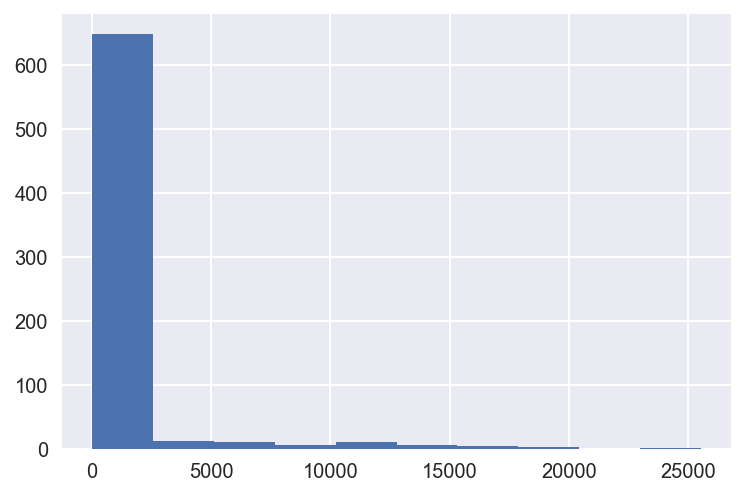

> 46 posts classified as viral with score greater than 3656.14682227
Virality given week time:


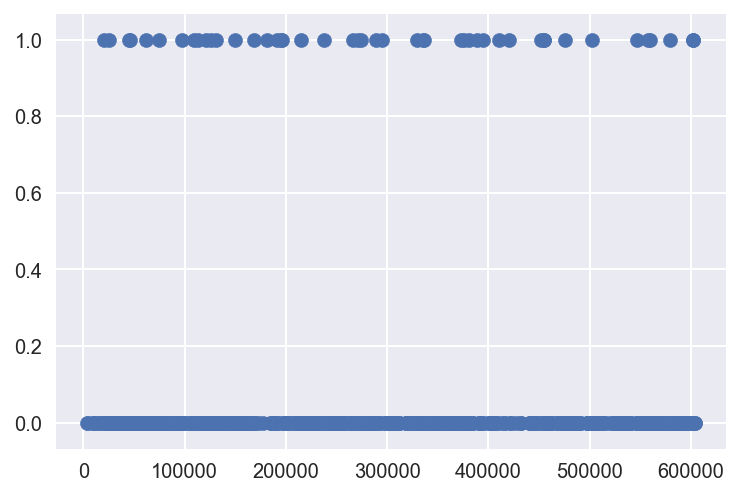

Virality given day time:


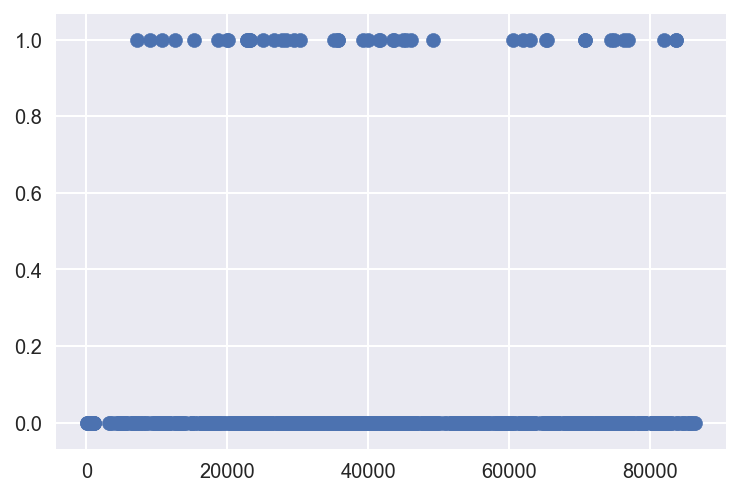

Virality given hour time:


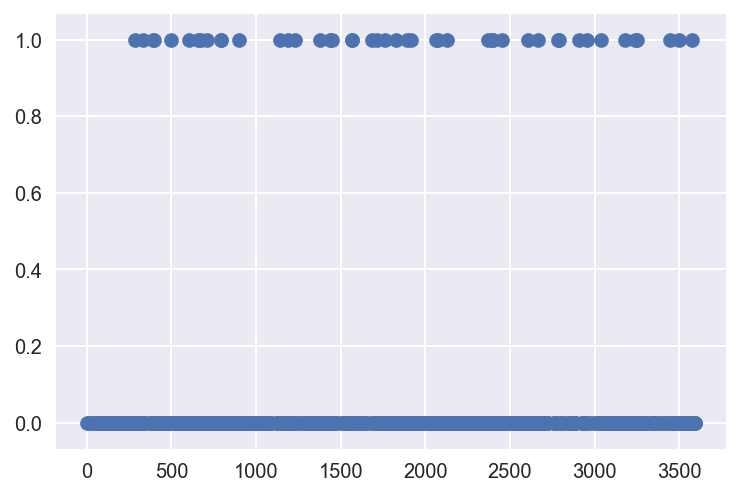

In [20]:
# Score distributions
stdev = np.std(score_distribution)
mean = np.mean(score_distribution)
print(stats.describe(score_distribution))

plt.hist(score_distribution)
plt.show()

# Times
VIRAL_THRESHOLD = mean + 1 * stdev
number = len([score for score in score_distribution if score > VIRAL_THRESHOLD])
print('>', number, 'posts classified as viral with score greater than', VIRAL_THRESHOLD)

times = [float(post['created_utc']) for post in collected_posts.posts]
viral = [int(int(post['score']) > VIRAL_THRESHOLD) for post in collected_posts.posts]


# Logistic Regression
print('Virality given week time:')
plt.scatter(list(map(unix_to_week_time, times)), viral)
plt.show()

print('Virality given day time:')
plt.scatter(list(map(unix_to_day_time, times)), viral)
plt.show()

print('Virality given hour time:')
plt.scatter(list(map(unix_to_hour_time, times)), viral)
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# classifier = LogisticRegression(random_state=0)
# times = np.array(times)
# viral = np.array(viral)
# classifier.fit(times, viral)

# y_pred = classifier.predict(times)
# from sklearn.metrics import confusion_matrix
# confusion_matrix = confusion_matrix(viral, y_pred)
# print(confusion_matrix)